<a href="https://colab.research.google.com/github/iamsusmita/ExChange/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

import yfinance as yf
aapl = yf.Ticker("TCS.NS")
aapl.info
data=aapl.history(period="max")
data.to_csv('TCS.NS.csv')
df=pd.read_csv('TCS.NS.csv')
df

#

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12 00:00:00+05:30,27.169599,28.064145,27.169599,27.853664,212976,0.0,0.0
1,2002-08-13 00:00:00+05:30,27.888752,28.336025,27.274849,27.476559,153576,0.0,0.0
2,2002-08-14 00:00:00+05:30,27.537949,27.537949,25.064795,25.582230,822776,0.0,0.0
3,2002-08-15 00:00:00+05:30,25.582230,25.582230,25.582230,25.582230,0,0.0,0.0
4,2002-08-16 00:00:00+05:30,25.450684,26.660950,25.082341,25.520844,811856,0.0,0.0
...,...,...,...,...,...,...,...,...
5466,2024-08-21 00:00:00+05:30,4518.000000,4560.000000,4492.549805,4551.500000,1896990,0.0,0.0
5467,2024-08-22 00:00:00+05:30,4560.000000,4560.950195,4497.200195,4502.000000,1829872,0.0,0.0
5468,2024-08-23 00:00:00+05:30,4500.000000,4506.000000,4455.000000,4463.899902,1809253,0.0,0.0
5469,2024-08-26 00:00:00+05:30,4489.000000,4552.149902,4485.000000,4502.450195,1844164,0.0,0.0


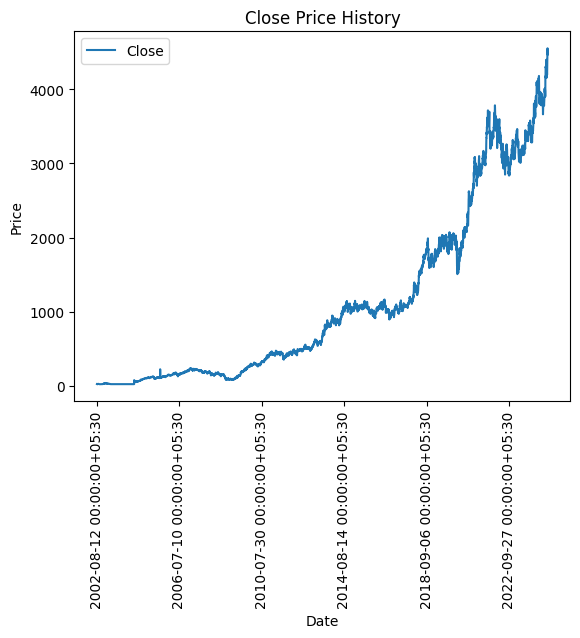

In [32]:
# Import the dataset
#dataset = pd.read_csv('S&P500-cleaned_prices.csv')
#
df.plot(x="Date", y="Close")
plt.xticks(rotation=90)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [33]:
#create the model
model = RandomForestRegressor() #n_estimators=100, random_state=42

In [34]:
#Train the model
feature=df[['Open','High','Low','Volume']]
feature=feature[:int(len(df)-2)]
target=df['Close'].shift(-1)
target=target[:int(len(df)-2)]
model.fit(feature,target)

RandomForestRegressor()

In [35]:
#Test the model
print('The model score is: ', model.score(feature,target) * 100)

The model score is:  99.99216928642069


In [41]:
# Make predictions
new_data=df[["Open","High","Low","Volume"]].tail(2)[0:1]
prediction=model.predict(new_data)
print('The prediction is: ', prediction)
print('The actual value is: ', df[['Close']].tail(1).values[0][0])

The prediction is:  [4496.05403809]
The actual value is:  4504.9501953125
